In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
dataSet = pd.read_csv('Walmart.csv')


In [14]:
dataSet.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
dataSet.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [16]:
dataSet.shape

(6435, 8)

In [17]:
dataSet.nunique()


Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [18]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [19]:
len(dataSet)

6435

In [20]:
dataSet['Date'] = pd.to_datetime(dataSet['Date'])

In [21]:
dataSet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [22]:
dataSet.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [23]:
sales = dataSet.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()

In [24]:
print(sales);

          Date        sales
0   2010-01-10  42239875.87
1   2010-02-04  50423831.26
2   2010-02-07  48917484.50
3   2010-02-19  48276993.78
4   2010-02-26  43968571.13
..         ...          ...
138 2012-10-08  47403451.04
139 2012-10-19  45122410.57
140 2012-10-26  45544116.29
141 2012-11-05  46925878.99
142 2012-12-10  46128514.25

[143 rows x 2 columns]


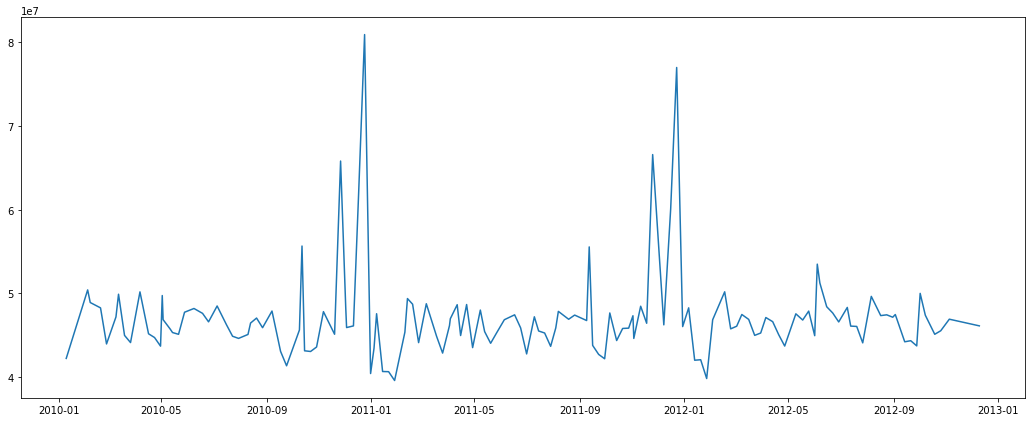

In [25]:
plt.figure(figsize=(18,7))
plt.plot(sales['Date'], sales['sales'])

In [26]:
dataSet[dataSet['Holiday_Flag'] == 1]['Date'].dt.date.unique()


array([datetime.date(2010, 12, 2), datetime.date(2010, 10, 9),
       datetime.date(2010, 11, 26), datetime.date(2010, 12, 31),
       datetime.date(2011, 11, 2), datetime.date(2011, 9, 9),
       datetime.date(2011, 11, 25), datetime.date(2011, 12, 30),
       datetime.date(2012, 10, 2), datetime.date(2012, 7, 9)],
      dtype=object)

In [27]:
holiday_week = dataSet[dataSet['Holiday_Flag'] == 1]
holiday_week = holiday_week.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()

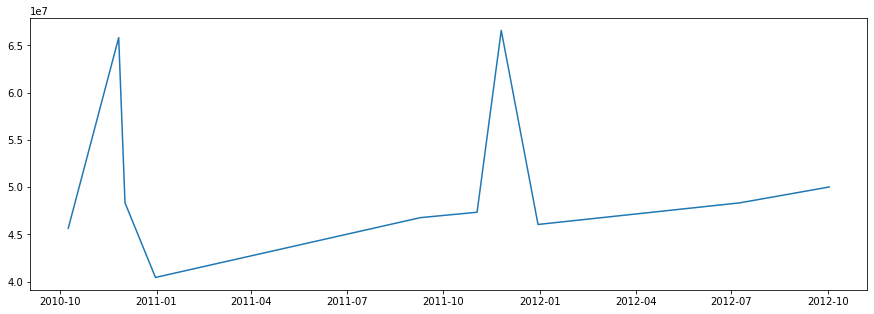

In [28]:
plt.figure(figsize=(15,5))
plt.plot(holiday_week['Date'], holiday_week['sales'])

In [29]:
holiday_week

,Date,sales
0,2010-10-09,45634397.84
1,2010-11-26,65821003.24
2,2010-12-02,48336677.63
3,2010-12-31,40432519.00
4,2011-09-09,46763227.53
5,2011-11-02,47336192.79
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-07-09,48330059.31
9,2012-10-02,50009407.92


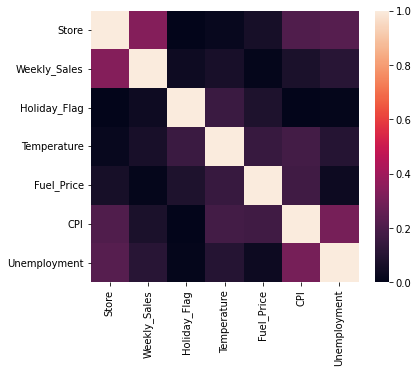

In [30]:
plt.figure(figsize = (6,5))
sns.heatmap(dataSet.corr().abs())    # To see the correlations
plt.show()

In [31]:
no_holiday_week = dataSet[dataSet['Holiday_Flag'] == 0]
no_holiday_week = no_holiday_week.groupby('Date')['Weekly_Sales'].agg(sales=sum).reset_index()
no_holiday_week

,Date,sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
128,2012-10-08,47403451.04
129,2012-10-19,45122410.57
130,2012-10-26,45544116.29
131,2012-11-05,46925878.99


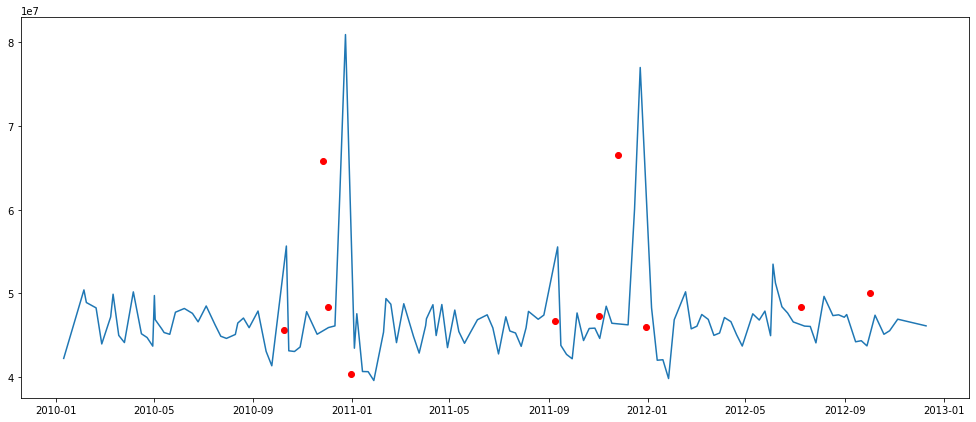

In [32]:
plt.figure(figsize=(17,7))
plt.scatter(holiday_week['Date'],holiday_week['sales'],c='red');
plt.plot(no_holiday_week['Date'],no_holiday_week['sales']);


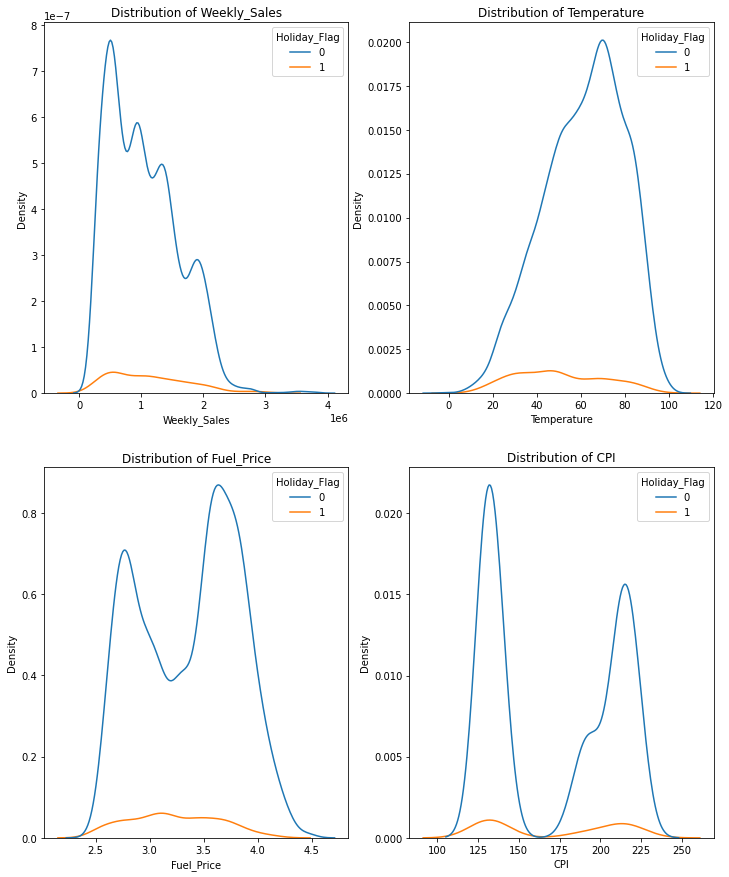

In [33]:
plt.figure(figsize=(12,15)) 
dist_cols=['Weekly_Sales', 'Temperature','Fuel_Price', 'CPI']
for i in range(0,len(dist_cols)):
    figure= plt.subplot(2,2,i+1)
    sns.kdeplot(data=dataSet, x=dist_cols[i], hue='Holiday_Flag')
    plt.title(f'Distribution of {dist_cols[i]}')

In [34]:
mean_CPI= dataSet.CPI.mean()

In [35]:
dataSet['Temperature']= np.where((dataSet['Temperature'] <= 65) & (dataSet['Temperature'] > 45) ,'Warm',
                            np.where((dataSet['Temperature'] <= 45) & (dataSet['Temperature'] > 25) ,'Cool'
                            ,
                            np.where((dataSet['Temperature'] <= 25) & (dataSet['Temperature'] >= 10) ,'Cold'
                            ,
                            'Hot')))

In [36]:
dataSet

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,Cool,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,Cool,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,Cool,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,Warm,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,Warm,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,Warm,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,Warm,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,Warm,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,Warm,3.969,192.330854,8.667


In [37]:
print(dataSet.Temperature.value_counts())

Hot     2939
Warm    2137
Cool    1141
Cold     218
Name: Temperature, dtype: int64


In [38]:
dataSet['day'] = dataSet['Date'].dt.weekday
dataSet['month'] = dataSet['Date'].dt.month
dataSet['year']  = dataSet['Date'].dt.year

In [40]:
# Total yearly sales
dataSet.groupby('year')['Weekly_Sales'].sum().sort_values(ascending=False).to_frame()

,Weekly_Sales
year,
2011,2.448200e+09
2010,2.288886e+09
2012,2.000133e+09


In [15]:
# The Top 10 stores in total sales over all years
dataSet.groupby(['Store'])['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False).head(10).reset_index()

,Store,Weekly_Sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08
5,10,2.716177e+08
6,27,2.538559e+08
7,6,2.237561e+08
8,1,2.224028e+08
9,39,2.074455e+08


In [19]:
dataSet.groupby('Temperature')['Weekly_Sales'].sum().to_frame().sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Temperature,
Hot,2.990193e+09
Warm,2.268263e+09
Cool,1.269942e+09
Cold,2.088218e+08


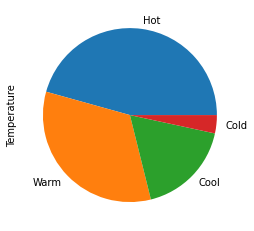

In [20]:
dataSet['Temperature'].value_counts().plot(kind='pie')
alpha_color=1


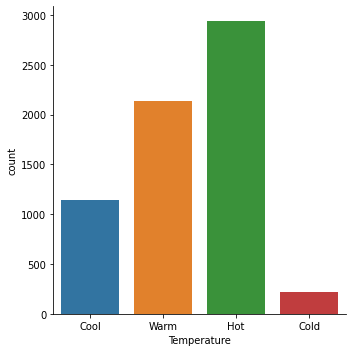

In [28]:
sns.catplot(x ="Temperature",
kind ="count", data = dataSet)